# 2) IACOV - Model Development for Prognosis - ICU
## Strategy 8) Training on 70% of a specific hospital plus same absolute number of other regions hospitals

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_20820\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'icu'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [8]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [9]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [10]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'icu', 'region', 'state'],
      dtype='object')

In [11]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

In [12]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [13]:
import ipywidgets as widgets
from IPython.display import clear_output

In [14]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [15]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [16]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [17]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [18]:
# !pip install ipywidgets

In [19]:
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [1271]:
display(dropdown_hospital)

Dropdown(index=14, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_…

**Filter all hospitals except the selected above**

In [1272]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [1273]:
from sklearn.model_selection import train_test_split

In [1274]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(47, 26)

In [1275]:
X_specific = df_iacov_model_lean_specific.drop(['icu'],axis=1)
X_specific.shape

(47, 25)

In [1276]:
y_specific = df_iacov_model_lean_specific['icu']
y_specific.shape

(47,)

In [1277]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [1278]:
X_train_specific.shape

(32, 25)

In [1279]:
X_test_specific.shape

(15, 25)

**Filter same absolute number from hospitals on O T H E R region**

PS: Also removed GHC hospital due to very low positive cases

In [1280]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[(~df_all_hospitals.index.isin(X_specific.index)) &
                                                       (df_all_hospitals.city_hospital != 'GHC_02')]

#Sample all hospitals of regions distinct of specific hospital
df_all_hospitals_other_region = df_all_hospitals_except_specific[df_all_hospitals_except_specific.region != X_specific.region.iloc[0]]

#Then, sample all hospital data with same absolute number on O T H E R region as specific hospital
df_iacov_model_lean = df_all_hospitals_other_region.sample(X_train_specific.shape[0], random_state=42)
df_iacov_model_lean.shape

(32, 26)

In [1281]:
#Check data from OTHER region
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                       8
CEARA_UNIMED                 6
HOSPPORTUGUES_SALVADOR       5
RIO_DE_JANEIRO_UNIMED        4
PERNAMBUCO_FULL              3
HOSPSANTACATARINABLUMENAU    2
PELOTAS                      2
HRL_2021_02                  1
HMV_POA_02                   1
Name: count, dtype: int64

**Append 70% data of specific hospital**

In [1282]:
df_iacov_model_lean = pd.concat([df_iacov_model_lean, X_train_specific], axis=0)
df_iacov_model_lean.shape

(64, 26)

In [1283]:
#Check after apending data of specific hospital
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
AMAZONAS_HUGV                32
HC_USP                        8
CEARA_UNIMED                  6
HOSPPORTUGUES_SALVADOR        5
RIO_DE_JANEIRO_UNIMED         4
PERNAMBUCO_FULL               3
HOSPSANTACATARINABLUMENAU     2
PELOTAS                       2
HRL_2021_02                   1
HMV_POA_02                    1
Name: count, dtype: int64

In [1284]:
print("Specific: " + specific_hospital )
print("(training -  - other regions - same absolute number) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: AMAZONAS_HUGV
(training -  - other regions - same absolute number) dataset: (64, 26)

(training - specific) dataset: (32, 25)

(test - specific) dataset: (15, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [1285]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(64, 25)

In [1286]:
#Preencho NAs com 0 
df_iacov_model_lean['icu'] = df_iacov_model_lean['icu'].fillna(0)
df_iacov_model_lean.icu.value_counts()

icu
0.000    52
1.000    12
Name: count, dtype: int64

In [1287]:
(df_iacov_model_lean.icu.value_counts()/len(df_iacov_model_lean.icu))*100

icu
0.000   81.250
1.000   18.750
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [1288]:
df_iacov_model_lean['class'] = df_iacov_model_lean['icu'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['icu'],axis=1)

### 2.1.4) Recalculating null mean_press

In [1289]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [1290]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,38,0,float64,-0.144,64.000,56.047,16.237,22.000,46.000,55.000,69.250,91.000
male,0,0.000,2,29,float64,-0.193,64.000,0.547,0.502,0.000,0.000,1.000,1.000,1.000
heart_rate,3,4.688,39,0,float64,1.119,61.000,91.221,20.368,57.000,80.000,88.000,102.000,172.000
resp_rate,11,17.188,24,0,float64,1.992,53.000,23.377,7.967,12.000,19.000,20.000,27.000,57.000
sys_press,7,10.938,41,0,float64,-0.055,57.000,129.193,24.046,79.000,112.000,130.000,148.000,180.000
dias_press,7,10.938,29,0,float64,0.876,57.000,76.895,14.979,44.000,68.000,76.000,81.000,120.000
mean_press,13,20.312,50,1,float64,-1.744,51.000,91.137,19.782,0.000,82.983,92.000,101.315,139.980
temp,12,18.750,27,0,float64,0.100,52.000,36.510,0.925,33.600,36.000,36.500,36.925,39.200
hemoglobin,10,15.625,48,0,float64,-0.339,54.000,11.821,2.445,6.890,9.775,12.285,13.488,16.450
platelets,4,6.250,60,0,float64,0.605,60.000,269929.333,135800.224,220.000,176250.000,251050.000,335725.000,625500.000


In [1291]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [1292]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,38,0,float64,-0.144,64.000,56.047,16.237,22.000,46.000,55.000,69.250,91.000
male,0,0.000,2,29,float64,-0.193,64.000,0.547,0.502,0.000,0.000,1.000,1.000,1.000
heart_rate,3,4.688,39,0,float64,1.119,61.000,91.221,20.368,57.000,80.000,88.000,102.000,172.000
resp_rate,11,17.188,24,0,float64,1.992,53.000,23.377,7.967,12.000,19.000,20.000,27.000,57.000
sys_press,7,10.938,41,0,float64,-0.055,57.000,129.193,24.046,79.000,112.000,130.000,148.000,180.000
dias_press,7,10.938,29,0,float64,0.876,57.000,76.895,14.979,44.000,68.000,76.000,81.000,120.000
mean_press,6,9.375,56,1,float64,-1.569,58.000,92.655,19.828,0.000,83.311,93.160,103.009,139.980
temp,12,18.750,27,0,float64,0.100,52.000,36.510,0.925,33.600,36.000,36.500,36.925,39.200
hemoglobin,10,15.625,48,0,float64,-0.339,54.000,11.821,2.445,6.890,9.775,12.285,13.488,16.450
platelets,4,6.250,60,0,float64,0.605,60.000,269929.333,135800.224,220.000,176250.000,251050.000,335725.000,625500.000


In [1293]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [1294]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [1295]:
x_test_specific_name = 'X_test_other_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_other_region_absolute_NORTE_AM_AMAZONAS_HUGV.csv'

In [1296]:
y_test_specific_name = 'y_icu_other_region_absolute_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_icu_other_region_absolute_NORTE_AM_AMAZONAS_HUGV.csv'

In [1297]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(15, 25)

In [1298]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(15,)

## 2.4) Prepare Experiment 

### All hospitals except specific

In [1299]:
df_iacov_model_lean.shape

(64, 25)

In [1300]:
df_iacov_model_train = df_iacov_model_lean

In [1301]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [1302]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2518 to 33
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              64 non-null     float64
 1   male             64 non-null     float64
 2   heart_rate       61 non-null     float64
 3   resp_rate        53 non-null     float64
 4   sys_press        57 non-null     float64
 5   dias_press       57 non-null     float64
 6   mean_press       58 non-null     float64
 7   temp             52 non-null     float64
 8   hemoglobin       54 non-null     float64
 9   platelets        60 non-null     float64
 10  hematocrit       52 non-null     float64
 11  red_cells_count  48 non-null     float64
 12  hcm              57 non-null     float64
 13  rdw              57 non-null     float64
 14  mcv              57 non-null     float64
 15  leukocytes       60 non-null     float64
 16  neutrophil       52 non-null     float64
 17  lymphocytes      55 

In [1303]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(64, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [1304]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [1305]:
X_train.shape

(72, 22)

In [1306]:
X_test.shape

(20, 22)

In [1307]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1308]:
seed

42

In [1309]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [1310]:
# print(inspect.getsource(compare_models))

In [1311]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.917900,1.000000,0.966700,0.866700,0.896700,0.920300,0.833100,0.889200,0.557500,0.800100
1,Extreme Gradient Boosting,0.932100,0.991700,1.000000,0.866700,0.896700,0.940300,0.863600,0.877100,0.578400,0.839900
2,Light Gradient Boosting Machine,0.903600,0.991700,0.966700,0.841700,0.881700,0.909600,0.807300,0.714900,0.525400,0.740500


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [1312]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.750,1.000,1.000,0.500,0.667,0.800,0.500,0.027,0.004,0.210
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.430,0.956
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.714,0.996
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.645,0.991
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.686,0.995
5,0.857,1.000,1.000,0.667,0.800,0.889,0.696,0.769,0.255,0.507
6,0.857,1.000,1.000,0.750,0.750,0.857,0.720,0.897,0.786,0.623
7,0.857,1.000,1.000,0.750,0.750,0.857,0.720,0.990,0.804,0.790
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.452,0.943
9,0.857,1.000,0.667,1.000,1.000,0.800,0.696,0.995,0.729,0.831


In [1313]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.750,0.969,1.000,0.500,0.667,0.800,0.500,0.622,0.537,0.342
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.858,0.102,0.559
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.951,0.103,0.681
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.960,0.123,0.710
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.934,0.091,0.630
5,0.857,1.000,1.000,0.667,0.800,0.889,0.696,0.875,0.177,0.512
6,0.857,0.833,1.000,0.750,0.750,0.857,0.720,0.631,0.694,0.248
7,0.857,0.917,1.000,0.750,0.750,0.857,0.720,0.822,0.266,0.426
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.925,0.097,0.606
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.950,0.112,0.677


In [1314]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.750,0.938,1.000,0.500,0.667,0.800,0.500,0.263,0.562,0.306
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.988,0.226,0.855
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.998,0.313,0.927
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.995,0.289,0.871
4,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.996,0.261,0.893
5,0.857,1.000,1.000,0.667,0.800,0.889,0.696,0.906,0.638,0.632
6,0.857,0.750,1.000,0.750,0.750,0.857,0.720,0.258,0.754,0.299
7,0.857,1.000,1.000,0.750,0.750,0.857,0.720,0.934,0.549,0.654
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.954,0.244,0.672
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.998,0.338,0.921


### Select best algorithm based on test data AUC

In [1315]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.800,0.531,0.000,1.000,0.000,0.000,0.000,0.000,0.050,0.015


In [1316]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.800,0.586,0.500,0.875,0.500,0.500,0.375,0.629,0.285,0.030


In [1317]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.850,0.594,0.500,0.938,0.667,0.571,0.483,0.036,0.774,0.186


In [1318]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
#preds = preds_lgb
preds = preds_xgb

### Best model

In [1319]:
npv(y_test, preds['Label'])

0.8823529411764706

In [1320]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.11', '1.00']

,,
,,
Ground Truth Prevalence,. . .,0.200
Test set Prevalence,. . .,0.150
True positive rate (recall),. . .,0.500
False positive rate,. . .,0.062
Positive predictive value (precision),. . .,0.667
True negative rate (specificity),. . .,0.938
False negative rate,. . .,0.500
Negative predictive value,. . .,0.882
Positive likelihood ratio (bigger is better),. . .,8.000


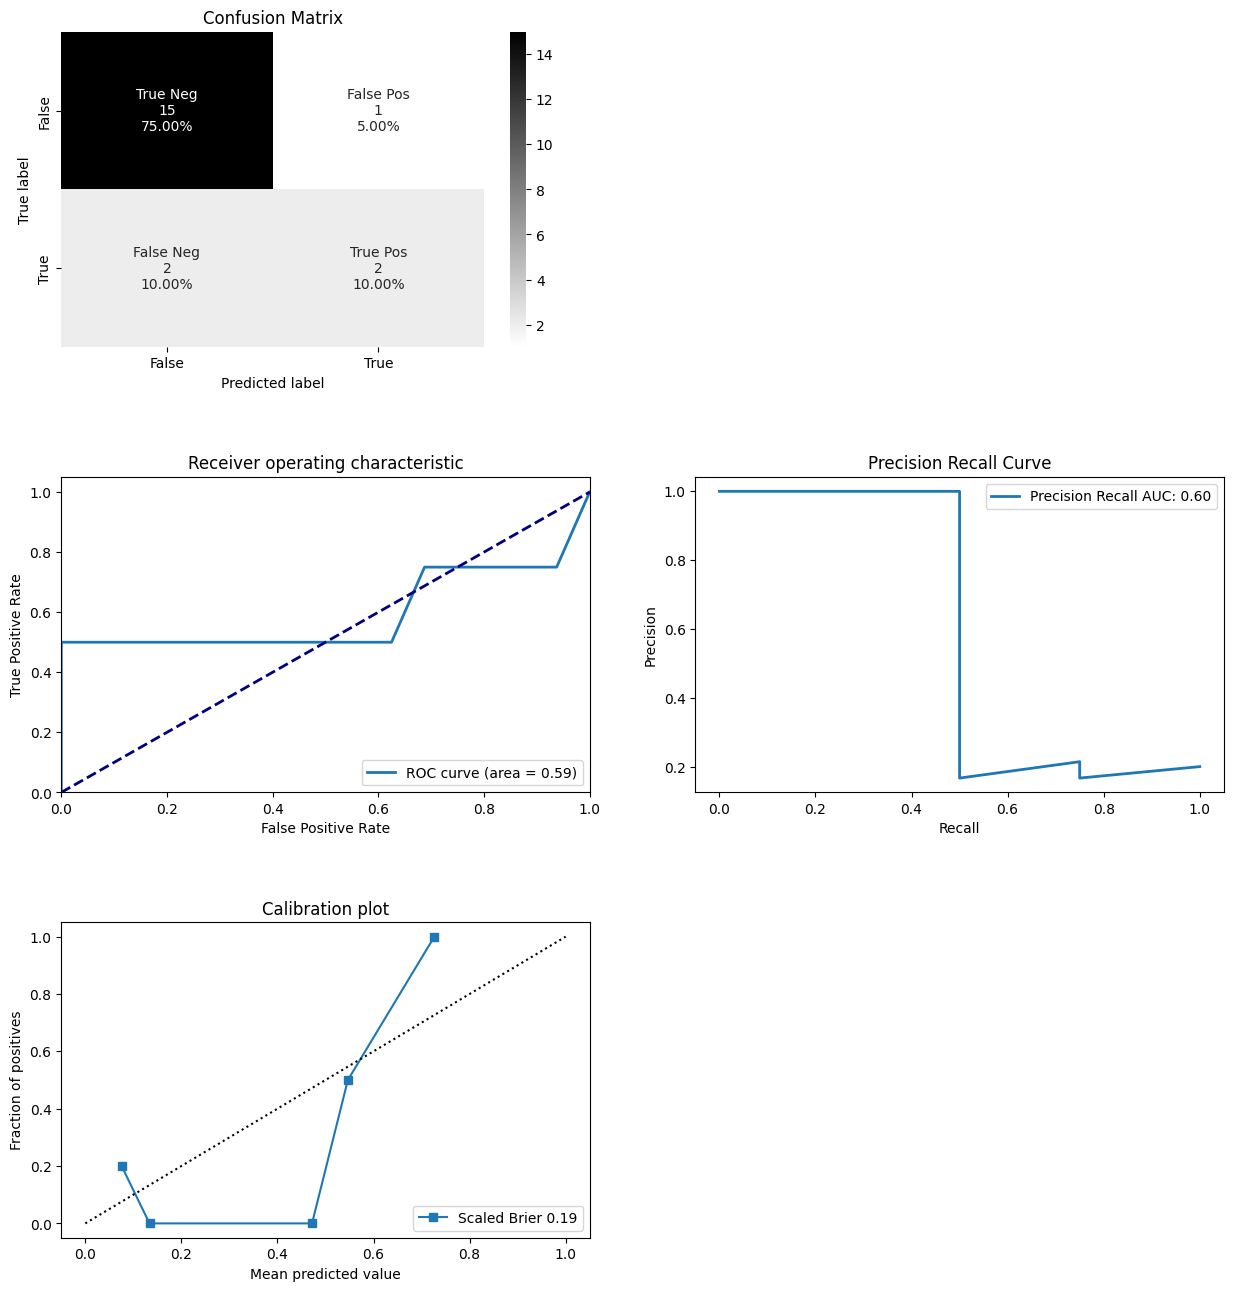

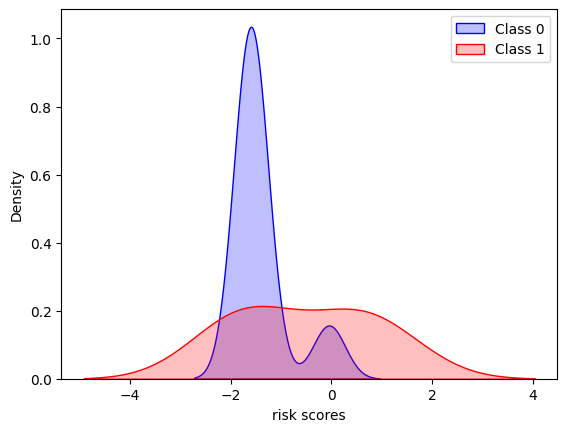

,,
,,
Ground Truth Prevalence,. . .,0.200
Test set Prevalence,. . .,0.150
True positive rate (recall),. . .,0.500
False positive rate,. . .,0.062
Positive predictive value (precision),. . .,0.667
True negative rate (specificity),. . .,0.938
False negative rate,. . .,0.500
Negative predictive value,. . .,0.882
Positive likelihood ratio (bigger is better),. . .,8.000


In [1321]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results 
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [1322]:
#evaluate_model(lgbmtuned)

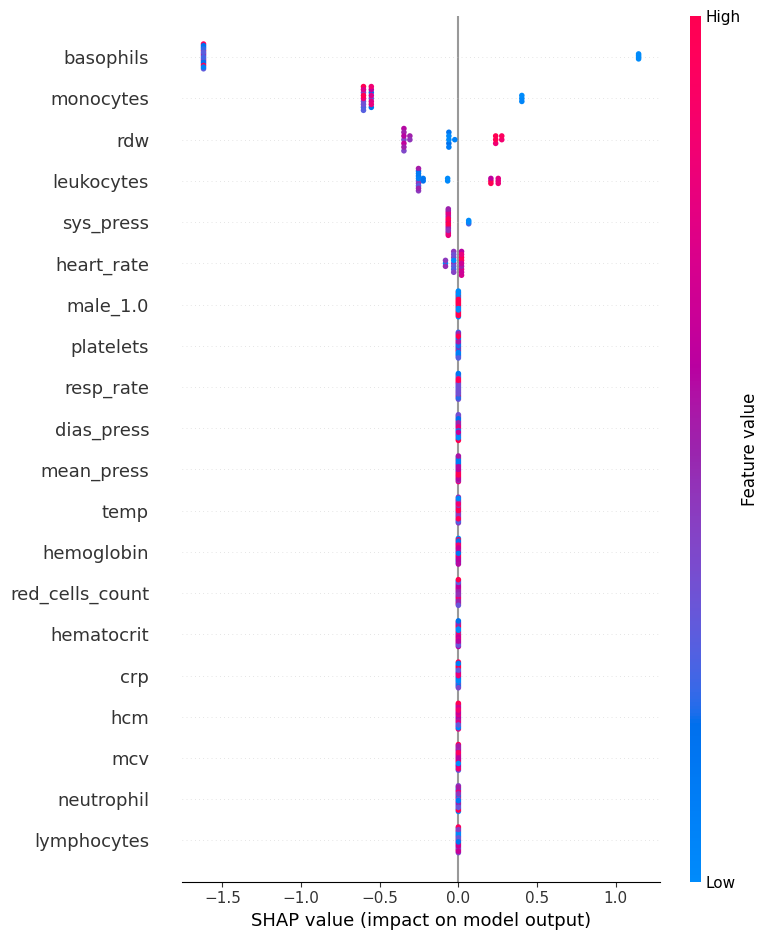

In [1323]:
#interpret_model(cattuned)
#interpret_model(lgbmtuned)
interpret_model(xgbtuned)

In [1324]:
# plot_model(lgbmtuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [1325]:
#final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
final_model = finalize_model(xgbtuned)

In [1326]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [1327]:
final_model_name = str(final_model.__class__.__name__) + '_other_region_abs_number_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'XGBClassifier_other_region_abs_number_NORTE_AM_AMAZONAS_HUGV'

In [1328]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [1330]:
#final_model.get_all_params()
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8500000000000001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.195, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=-2,
              num_parallel_tree=None, random_state=42, ...)

# Use the saved model to predict on specific hospital

In [1331]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)
other_region_abs_number_model_pkl = final_model_name + ".pkl"
prep_pipe_other_region_abs_number, other_region_abs_number_model = joblib.load(other_region_abs_number_model_pkl)

loaded: XGBClassifier_other_region_abs_number_NORTE_AM_AMAZONAS_HUGV


In [1332]:
other_region_abs_number_model.__class__.__name__

'XGBClassifier'

In [1333]:
x_test_specific_name

'X_test_other_region_absolute_NORTE_AM_AMAZONAS_HUGV.csv'

In [1334]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(15, 25)

In [1335]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [1336]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["icu"]
y_test_single.shape

(15,)

In [1337]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
31,AMAZONAS_HUGV,66.000,0.000,89.000,28.000,130.000,69.000,89.313,37.500,11.160,296500.000,34.720,4.400,29.520,13.000,91.870,17060.000,14212.000,1023.000,124.000,0.000,1699.000,94.000,NORTE,AM
1,AMAZONAS_HUGV,61.000,1.000,86.000,18.000,172.000,75.000,107.301,34.800,11.600,110900.000,35.960,4.370,26.660,11.790,82.250,12710.000,12201.000,381.000,0.000,0.000,127.000,15.100,NORTE,AM
29,AMAZONAS_HUGV,75.000,0.000,82.000,24.000,128.000,80.000,95.984,36.400,12.010,198500.000,35.940,4.200,28.580,10.330,85.500,4270.000,3112.000,835.000,19.000,2.000,299.000,3.200,NORTE,AM
21,AMAZONAS_HUGV,66.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,11.750,453800.000,36.890,4.110,28.550,11.680,89.620,8242.000,5114.000,1534.000,53.000,198.000,1340.000,20.900,NORTE,AM
2,AMAZONAS_HUGV,28.000,1.000,80.000,30.000,117.000,56.000,76.313,37.400,6.400,237000.000,20.100,2.470,25.800,13.500,81.500,11400.000,9784.000,776.000,63.000,126.000,651.000,200.400,NORTE,AM


In [1338]:
X_test_single["class"] = y_test_single

In [1339]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [1340]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [1341]:
X_test_single_transformed = prep_pipe_other_region_abs_number.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Categorical


,class,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,male_1.0
31,1,0.683,0.369,0.983,-0.026,-0.499,-0.288,1.547,0.569,0.168,0.510,0.900,0.843,0.061,1.396,0.824,0.685,0.084,0.971,-0.477,1.942,-0.080,0.000
1,1,0.330,0.075,-1.538,2.024,0.073,1.167,-2.483,0.730,-0.980,0.699,0.861,-0.794,-0.428,-0.812,0.211,0.376,-0.875,-1.098,-0.477,-1.113,-1.056,1.000
29,0,1.318,-0.317,-0.025,-0.124,0.550,0.252,-0.095,0.879,-0.438,0.696,0.642,0.305,-1.017,-0.066,-0.980,-1.023,-0.196,-0.781,-0.466,-0.779,-1.203,0.000
21,0,0.683,0.222,-0.151,-0.075,0.312,0.009,0.129,0.784,1.140,0.842,0.526,0.287,-0.472,0.880,-0.420,-0.715,0.848,-0.214,0.590,1.244,-0.984,0.000
2,1,-2.001,-0.512,1.487,-0.661,-1.739,-1.339,1.398,-1.167,-0.200,-1.727,-1.586,-1.287,0.263,-0.984,0.026,0.004,-0.285,-0.047,0.202,-0.095,1.235,1.000


In [1342]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [1343]:
X_test_single_transformed.shape

(15, 22)

In [1344]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1345]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1346]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

[]

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [1347]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [1348]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [1349]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1350]:
X_test_single_transformed.shape

(15, 22)

In [1351]:
X_test_single_transformed.shape

(15, 22)

In [1352]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [1353]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

**Reorder columns**

In [1354]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [1355]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(15, 22)

0.48863636363636365


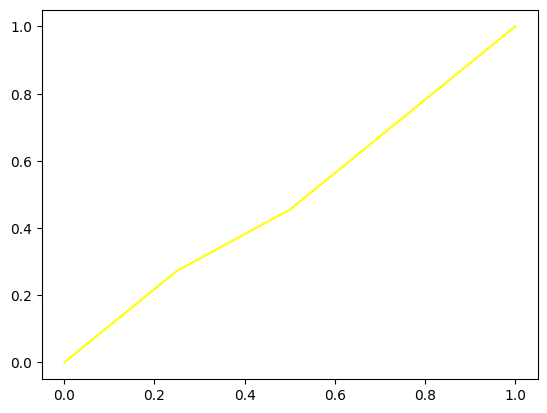

In [1356]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = other_region_abs_number_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best - AUC " +  str(auc_ind), color="yellow")

In [1357]:
y_pred_prob1.shape

(15,)

In [1358]:
y_pred = other_region_abs_number_model.predict(X_test_single_transformed)

,,
,,
Ground Truth Prevalence,. . .,0.733
Test set Prevalence,. . .,0.267
True positive rate (recall),. . .,0.273
False positive rate,. . .,0.250
Positive predictive value (precision),. . .,0.750
True negative rate (specificity),. . .,0.750
False negative rate,. . .,0.727
Negative predictive value,. . .,0.273
Positive likelihood ratio (bigger is better),. . .,1.091


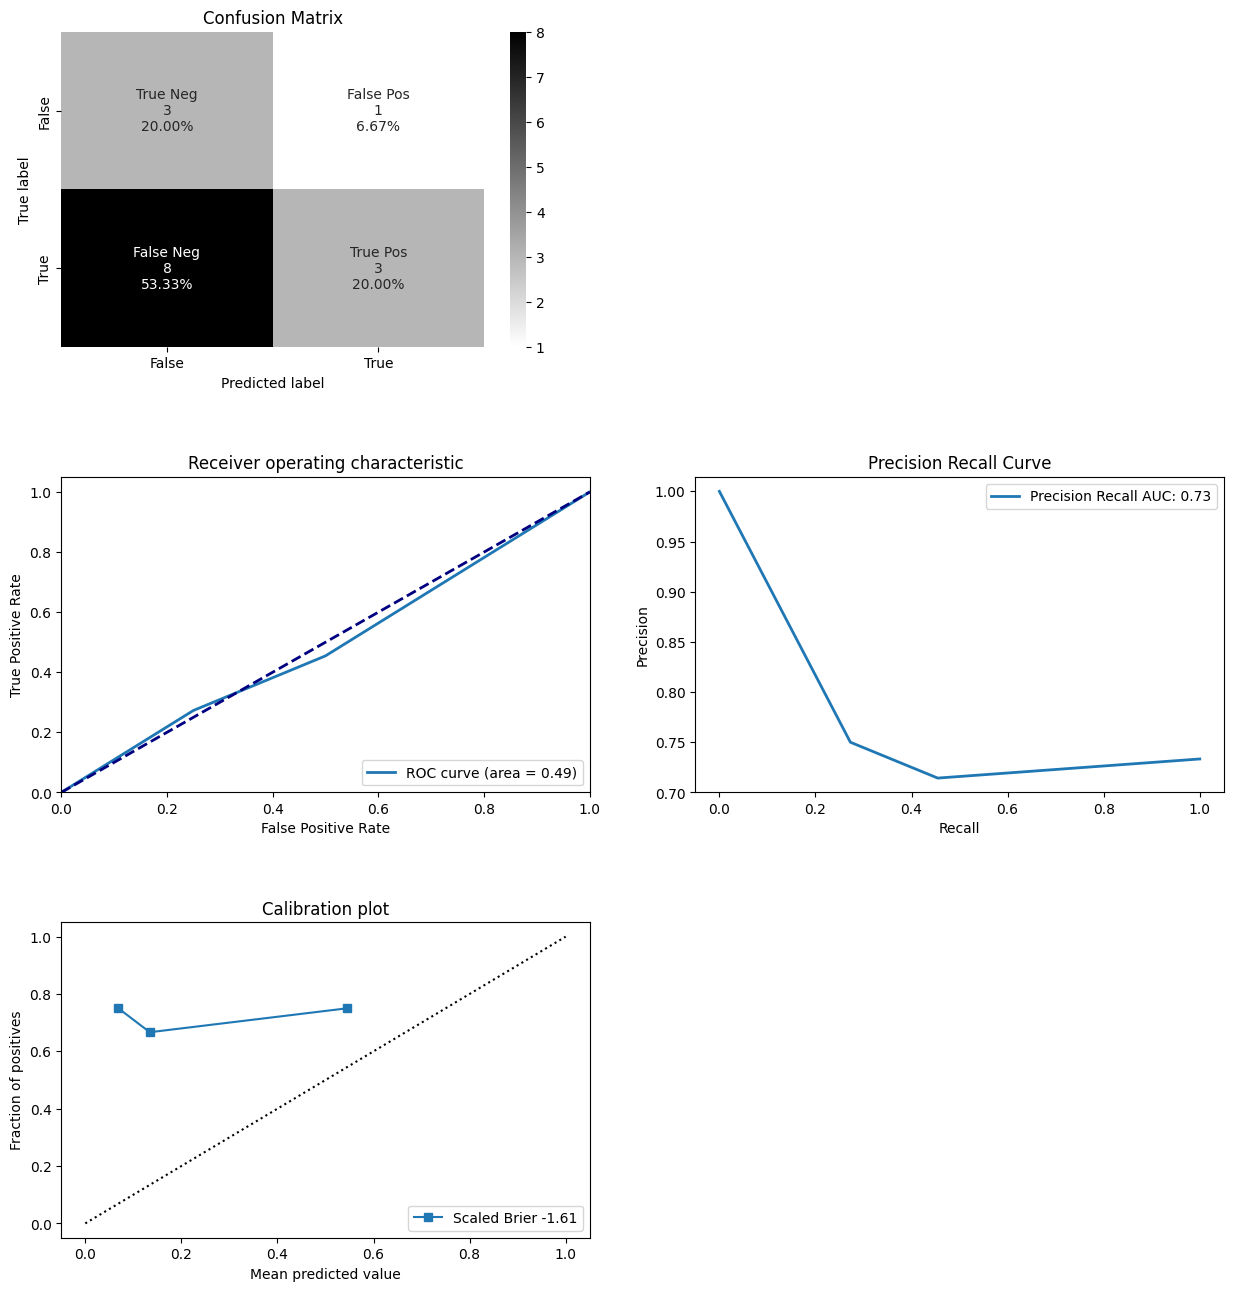

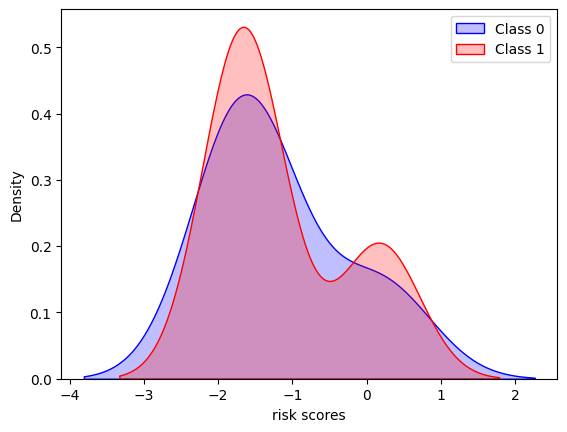

,,
,,
Ground Truth Prevalence,. . .,0.733
Test set Prevalence,. . .,0.267
True positive rate (recall),. . .,0.273
False positive rate,. . .,0.250
Positive predictive value (precision),. . .,0.750
True negative rate (specificity),. . .,0.750
False negative rate,. . .,0.727
Negative predictive value,. . .,0.273
Positive likelihood ratio (bigger is better),. . .,1.091


In [1359]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [1360]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.48863636363636365

In [1361]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.16', '0.82']

In [1362]:
#recall
tpr(y_test_single, y_pred)

0.2727272727272727

In [1363]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.75

In [1364]:
#accuracy
accuracy(y_test_single, y_pred)

0.4

In [1365]:
ppv(y_test_single, y_pred)

0.75

In [1366]:
npv(y_test_single, y_pred)

0.2727272727272727

# Ending Predicting part

### Passo 1) Ordeno pelo score

In [ ]:
X_Test_Rankeado_general = preds

In [ ]:
X_Test_Rankeado_general["Score"].head()

In [ ]:
X_Test_Rankeado_general.sort_values(by=['Score'],inplace=True)
X_Test_Rankeado_general["Score"].head()

In [ ]:
X_Test_Rankeado_general

### Passo 2) Crio os decis (pelo n de observações)

In [ ]:
X_Test_Rankeado_general.index

In [ ]:
X_Test_Rankeado_general['decile'] = pd.qcut(x=X_Test_Rankeado_general.Score,q=10, labels=False)

In [ ]:
X_Test_Rankeado_general.head()

In [ ]:
# X_Test_Rankeado_general.to_csv('X_Test_Rankeado_general.csv', sep=';')

In [ ]:
X_Test_Rankeado_general.decile.value_counts()

In [ ]:
# labels_decile = ['1','2','3','4','5','6','7','8','9','10']
# X_Test_Rankeado_general['Decile'] = pd.cut(X_Test_Rankeado_general["Score"], 
#                                    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
#                                    include_lowest=True, labels=labels_decile)

In [ ]:
# labels_decile = ['1','2','3','4','5','6','7','8','9','10']
# X_Test_Rankeado_general['Decile'] = pd.cut(X_Test_Rankeado_general["Score"], 
#                                    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
#                                    include_lowest=True, labels=labels_decile)

In [ ]:
# X_Test_Rankeado_general[["class","Label","Score","Decile"]][X_Test_Rankeado_general["Score"]>=0.5]

In [ ]:
deciles = X_Test_Rankeado_general[['Label','decile']].groupby(['decile']).size()
deciles

In [ ]:
sum(deciles[0:6])

In [ ]:
X_Test_Rankeado_general.shape

In [ ]:
#Antes
# low_risk_general = sum(deciles[0:6])
# medium_risk_general = sum(deciles[6:9])
# high_risk_general = sum(deciles[9:10])

# print("low: " + str(low_risk_general))
# print("medium: " + str(medium_risk_general))
# print("high: " + str(high_risk_general))

In [ ]:
low_risk_general = sum(deciles[0:6])
medium_risk_general = sum(deciles[6:8])
high_risk_general = sum(deciles[8:10])

print("low: " + str(low_risk_general))
print("medium: " + str(medium_risk_general))
print("high: " + str(high_risk_general))

In [ ]:
labels_groups = ['low','medium','high']
X_Test_Rankeado_general['risk_group'] = pd.cut(X_Test_Rankeado_general["decile"], 
                                   bins=[0, 5, 7, 10], 
                                   include_lowest=True, labels=labels_groups)

In [ ]:
X_Test_Rankeado_general['class']

In [ ]:
#Low risk - observed
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='low') & (X_Test_Rankeado_general['class']==1)].shape

In [ ]:
low_risk_general = X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='low') & (X_Test_Rankeado_general['class']==1)].shape[0]
low_risk_general

In [ ]:
#Low risk - predicted
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='low') & (X_Test_Rankeado_general['Label']==1)].shape

In [ ]:
#Low risk - predicted corrected
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='low') & (X_Test_Rankeado_general['Label']==1) & (X_Test_Rankeado_general['class']==1)].shape

In [ ]:
#Medium risk - observed
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='medium') & (X_Test_Rankeado_general['class']==1)].shape

In [ ]:
medium_risk_general = X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='medium') & (X_Test_Rankeado_general['class']==1)].shape[0]
medium_risk_general

In [ ]:
#Medium risk - predicted
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='medium') & (X_Test_Rankeado_general['Label']==1)].shape

In [ ]:
#Medium risk - predicted corrected
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='medium') & (X_Test_Rankeado_general['Label']==1) & (X_Test_Rankeado_general['class']==1)].shape

In [ ]:
#High risk - observed
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='high') & (X_Test_Rankeado_general['class']==1)].shape

In [ ]:
high_risk_general = X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='high') & (X_Test_Rankeado_general['class']==1)].shape[0]
high_risk_general

In [ ]:
#High risk - predicted
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='high') & (X_Test_Rankeado_general['Label']==1)].shape

In [ ]:
#High risk - predicted corrected
X_Test_Rankeado_general[ (X_Test_Rankeado_general['risk_group']=='high') & (X_Test_Rankeado_general['Label']==1) & (X_Test_Rankeado_general['class']==1)].shape

In [ ]:
X_Test_Rankeado_general['risk_group'].value_counts()

In [ ]:
X_Test_Rankeado_specific = preds
X_Test_Rankeado_specific["Score"].head()

In [ ]:
X_Test_Rankeado_specific.sort_values(by=['Score'],inplace=True)
X_Test_Rankeado_specific["Score"].head()

### Passo 2) Crio os Decis

In [ ]:
X_Test_Rankeado_specific.index

In [ ]:
X_Test_Rankeado_specific['decile'] = pd.qcut(x=X_Test_Rankeado_specific.Score,q=10, labels=False)
X_Test_Rankeado_specific.decile.value_counts()

In [ ]:
deciles = X_Test_Rankeado_specific[['Label','decile']].groupby(['decile']).size()
deciles

In [ ]:
low_risk_specific = sum(deciles[0:6])
medium_risk_specific = sum(deciles[6:8])
high_risk_specific = sum(deciles[8:10])

print("low: " + str(low_risk_specific))
print("medium: " + str(medium_risk_specific))
print("high: " + str(high_risk_specific))

In [ ]:
labels_groups = ['low','medium','high']
X_Test_Rankeado_specific['risk_group'] = pd.cut(X_Test_Rankeado_specific["decile"], 
                                   bins=[0, 5, 7, 10], 
                                   include_lowest=True, labels=labels_groups)

In [ ]:
low_risk_specific = X_Test_Rankeado_specific[ (X_Test_Rankeado_specific['risk_group']=='low') & (X_Test_Rankeado_specific['class']==1)].shape[0]
low_risk_specific

In [ ]:
medium_risk_specific = X_Test_Rankeado_specific[ (X_Test_Rankeado_specific['risk_group']=='medium') & (X_Test_Rankeado_specific['class']==1)].shape[0]
medium_risk_specific

In [ ]:
high_risk_specific = X_Test_Rankeado_specific[ (X_Test_Rankeado_specific['risk_group']=='high') & (X_Test_Rankeado_specific['class']==1)].shape[0]
high_risk_specific

In [ ]:
total_risk_general = low_risk_general + medium_risk_general + high_risk_general
total_risk_specific = low_risk_specific + medium_risk_specific + high_risk_specific

data2 = {'model': ['general','specialist'],
        'low': [low_risk_general/total_risk_general*100,low_risk_specific/total_risk_specific*100], 
        'medium': [medium_risk_general/total_risk_general*100,medium_risk_specific/total_risk_specific*100], 
        'high': [high_risk_general/total_risk_general*100,high_risk_specific/total_risk_specific*100]}
df_risks2 = pd.DataFrame(data2)
df_risks2

In [ ]:
labels = ['general \n(n=36089)','specialist\n(n=2289)']

pal = ["silver", "lightsalmon", "lightcoral"]

ax_1=df_risks2.plot.bar(figsize=(8,6),stacked=True, rot=0, color=pal,label=labels)
ax_1.set_xticklabels(labels)
ax_1.legend(bbox_to_anchor=(1.1, 0.95), bbox_transform=ax_1.transAxes)

ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)

ax_1.set_title('Observed values by risk group')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2 +0.9,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom')

In [ ]:
total_risk_general = low_risk_general + medium_risk_general + high_risk_general
total_risk_specific = low_risk_specific + medium_risk_specific + high_risk_specific

data_en = {'model': ['generalista','especialista'],
        'low': [low_risk_general/total_risk_general*100,low_risk_specific/total_risk_specific*100], 
        'moderate': [medium_risk_general/total_risk_general*100,medium_risk_specific/total_risk_specific*100], 
        'high': [high_risk_general/total_risk_general*100,high_risk_specific/total_risk_specific*100]}
df_risks_en = pd.DataFrame(data_en)
df_risks_en

In [ ]:
total_risk_general

In [ ]:
total_risk_specific

In [ ]:
labels = ['model for general population \n(n=36089)','model for exposed workers\n(n=2289)']

pal = ["cornflowerblue", "lightsalmon", "lightcoral"]

ax_1=df_risks_en.plot.bar(figsize=(8,6),stacked=True, rot=0, color=pal,label=labels, width=0.5)
ax_1.set_xticklabels(labels)
ax_1.legend(bbox_to_anchor=(1.1, 0.95), bbox_transform=ax_1.transAxes)

ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)

ax_1.set_title('Distribution of risk categories predicted in the test set')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2 +0.9,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom')

In [ ]:
final_model_specific = finalize_model(ettuned)

preds_specific = predict_model(final_model_specific, data=df_uk_exposed)
preds_specific

In [ ]:
preds_specific[['Score','class', 'Label']][preds_specific['Score']>0.3]

### Plot participants at risk using all data with final models for each 

In [ ]:
# preds_general = predict_model(final_model_general, data=df_uk_all_boruta)
# preds_general

In [ ]:
# preds_specific = predict_model(final_model_specific, data=df_uk_exposed)
# preds_specific

In [ ]:
X_Test_Rankeado_general_final = preds_general
labels_decile = ['1','2','3','4','5','6','7','8','9','10']
X_Test_Rankeado_general_final['Decile'] = pd.cut(X_Test_Rankeado_general_final["Score"], 
                                   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                                   include_lowest=True, labels=labels_decile)

# X_Test_Rankeado_general_final[['Label','Decile']].groupby(['Decile']).size()

deciles_general_final = X_Test_Rankeado_general_final[['Label','Decile']].groupby(['Decile']).size()
deciles_general_final

low_risk_general_final = sum(deciles_general_final[0:6])
medium_risk_general_final = sum(deciles_general_final[6:9])
high_risk_general_final = sum(deciles_general_final[9:10])

print("low (general): " + str(low_risk_general_final))
print("medium (general): " + str(medium_risk_general_final))
print("high (general): " + str(high_risk_general_final))

In [ ]:
X_Test_Rankeado_specific_final = preds_specific
X_Test_Rankeado_specific_final['Decile'] = pd.cut(X_Test_Rankeado_specific_final["Score"], 
                                   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                                   include_lowest=True, labels=labels_decile)

X_Test_Rankeado_specific_final[['Label','Decile']].groupby(['Decile']).size()

deciles_specific_final = X_Test_Rankeado_specific_final[['Label','Decile']].groupby(['Decile']).size()
deciles_specific_final

low_risk_specific_final = sum(deciles_specific_final[0:6])
medium_risk_specific_final = sum(deciles_specific_final[6:9])
high_risk_specific_final = sum(deciles_specific_final[9:10])

print("low (specific): " + str(low_risk_specific_final))
print("medium (specific): " + str(medium_risk_specific_final))
print("high (specific): " + str(high_risk_specific_final))

In [ ]:
total_risk_general_final = low_risk_general_final + medium_risk_general_final + high_risk_general_final
total_risk_specific_final = low_risk_specific_final + medium_risk_specific_final + high_risk_specific_final

data_risk_groups = {'modelo': ['generalista','especialista'],
        'baixo': [low_risk_general_final/total_risk_general_final*100,low_risk_specific_final/total_risk_specific_final*100], 
        'médio': [medium_risk_general_final/total_risk_general_final*100,medium_risk_specific_final/total_risk_specific_final*100], 
        'alto': [high_risk_general_final/total_risk_general_final*100,high_risk_specific_final/total_risk_specific_final*100]}
df_risks_groups = pd.DataFrame(data_risk_groups)
df_risks_groups

In [ ]:
labels = ['generalista','especialista']

pal = ["silver", "lightsalmon", "lightcoral"]

ax_1=df_risks_groups.plot.bar(figsize=(8,6),stacked=True, rot=0, color=pal,label=labels)
ax_1.set_xticklabels(labels)
ax_1.legend(bbox_to_anchor=(1.1, 0.95), bbox_transform=ax_1.transAxes)

ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)

ax_1.set_title('')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2 +0.9,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom')

## 6) Plots and other tests

In [ ]:
#Best parameters according to simple boruta - 'bmi', 'CRP', 'Creatinine'
#Best parameters according to simple boruta - 'bmi'
#age_at_recruitment', 'bmi', 'asthma_history', 'cough_most_days_1.0', 'phlegms_most_days_1.0
##### X
#features in the green area (manter): ['age_at_recruitment', 'bmi', 'haematocrit_percentage', 'leukocyte_count', 'neutrophill_count', 'albumin', 'shortness_of_breath', 'asthma_history', 'CRP', 'Urea', 'cough_most_days_1.0', 'phlegms_most_days_1.0']
#features in the blue area (a critério do pesquisador): ['platelet_count'] 
# Shap values in barplot style


import matplotlib.pyplot as pl
import shap

e1 = shap.TreeExplainer(forest)
shap_values = e1.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar",max_display=15)

In [ ]:
plot_model(rftuned, plot='ktops')

In [ ]:
evaluate_model(ettuned)

In [ ]:
# Shap values in barplot style
import matplotlib.pyplot as pl
import shap

e1 = shap.TreeExplainer(ettuned)
shap_values = e1.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=15)

In [ ]:
evaluate_model(rftuned)

### Build a model with all data

In [ ]:
ettuned

In [ ]:
final_model = finalize_model(rftuned)

### Using model to predict unseen outcome

In [ ]:
preds = predict_model(ettuned)
preds

In [ ]:
preds["Score"].to_csv('y_hat_score_death.csv', sep=';')

In [ ]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds['Label'], preds['Score'])

### Check confusion matrix to see if there is any zero values

In [ ]:
model = xgbtuned
y_outcome_test = y_obito

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_true = y_outcome_test, y_pred = model.predict(X_test), labels=(0,1))

plot_confusion_matrix(model, X_test, y_outcome_test, 
                                 cmap=plt.cm.Blues)  # doctest: +SKIP
plt.show()

In [ ]:
#ROC AUC
from sklearn.metrics import roc_curve,auc
fprate, tprate, thresholds = roc_curve(y_obito, preds['Score'], pos_label=1)
auc(fprate, tprate)

In [ ]:
AUC_CI(y_obito, preds['Score'])

In [ ]:
accuracy(y_obito, preds['Label'])

In [ ]:
#Recall
tpr(y_obito, preds['Label'])

In [ ]:
#Specificity
tnr(y_obito, preds['Label'])
#tpr(y_obito, preds['Label'])

In [ ]:
#Precision
ppv(y_obito, preds['Label'])

In [ ]:
f1_score(y_obito, preds['Label'])

# 6) Generate ROC curves

### CARREGO O MODELO UNICO SEPARADAMENTE PARA PLOTAR A AUC JUNTO COM O AGREGADO

In [ ]:
import pickle
import joblib

#Carrego o modelo unico
single_model_pkl = "rftuned_death_58_var.pkl"
prep_pipe_single, single_model = joblib.load(single_model_pkl)

In [ ]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv("X_test_obito_above_10_miss.csv", delimiter=";",index_col=0)

In [ ]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv("y_test_obito_above_10_miss.csv", delimiter=";",index_col=0)
y_test_single = y_test_single["class"]
y_test_single.shape

In [ ]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)
# from sklearn.metrics import roc_curve

y_pred_prob1 = single_model.predict_proba(X_test_single)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - Extra Trees - AUC " +  str(auc_ind), color="yellow")

In [ ]:
#Vejo a curva ROC do modelo AGREGADO e confirmo o valor da AUC
from sklearn.metrics import roc_curve

y_pred_prob2 = rftuned.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_obito, y_pred_prob2)
auc_aggreg = auc(fpr2, tpr2)
print(auc_aggreg)
plt.plot(fpr2, tpr2, label= "Aggregated Model - Extra Trees - AUC " + str(auc_aggreg)  , color="orange")

In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
from sklearn.metrics import roc_curve

classifier1=rftuned
classifier2=single_model
# classifier3=ettunedind
#model=cattuned

#ROC Curve - Modelo Agregado
y_pred_prob1 = classifier1.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_obito, y_pred_prob1)
ci_agreggated = AUC_CI(y_obito, y_pred_prob1)


#ROC Curve - Modelo Single
y_pred_prob2 = single_model.predict_proba(X_test_single)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test_single, y_pred_prob2)
ci_single = AUC_CI(y_test_single, y_pred_prob2)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:white')

ax.spines['left'].set_color('#dddddd')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd')
ax.spines['right'].set_color('#dddddd')

plt.grid(color='grey', linestyle='solid',alpha=0.3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "All except death - Random Forest - AUC " + str(np.around(ci_agreggated,2)), color="slateblue")
plt.plot(fpr2, tpr2, label= "Single Model - Extra Trees - AUC "  + str(np.around(ci_single,2)), color="tomato")

plt.legend(frameon=True, shadow=True, borderpad=1, facecolor="white")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

### Save experiment for reproducibility purposes

In [ ]:
save_model(ettuned,"ettuned_death",verbose=True)

In [ ]:
save_model(final_model,"final_rf_5_except_death",verbose=True)

In [ ]:
save_experiment('bp6_covid_5_except_death')

# 7) END -  Codes for generating graphs for MLP or catboost

In [ ]:
#Ref: https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# RUN FOR MLP ONLY OR OTHERS WITHOUT INTERPRET_MODEL
import shap
import time

mlp_explainer = shap.KernelExplainer(mlptuned.predict,X_test)

start_time = time.time()
mlp_shap_values = mlp_explainer.shap_values(X_test)
elapsed_time = time.time() - start_time

shap.summary_plot(mlp_shap_values, X_test)

elapsed_time_min = elapsed_time/60
print("Tempo decorrido: ", elapsed_time_min, " minutes")

In [ ]:
#Ref: https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# RUN FOR MLP ONLY OR OTHERS WITHOUT INTERPRET_MODEL
import shap
import time

mlp_explainer = shap.KernelExplainer(mlptuned.predict,X_test)

start_time = time.time()
mlp_shap_values = mlp_explainer.shap_values(X_test)
elapsed_time = time.time() - start_time

shap.summary_plot(mlp_shap_values, X_test)

elapsed_time_min = elapsed_time/60
print("Tempo decorrido: ", elapsed_time_min, " minutes")

In [ ]:
#Ref: https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

# MESMA COISA QUE ANTERIOR SÓ QUE COM K-MEANS
# https://www.jishuwen.com/d/2HSF
    
import shap
import time

X_test_summary = shap.kmeans(X_test, 10)
start_time = time.time()

explainer = shap.KernelExplainer(mlptuned.predict, X_test_summary)

shap_values_mlp_test = explainer.shap_values(X_test)

elapsed_time = time.time() - start_time
elapsed_time_min = elapsed_time/60

print("Elapsed time: ", elapsed_time_min, " minutes")

shap.summary_plot(shap_values_mlp_test, X_test)

In [ ]:
#Plotar gráfico de densidade (Catboost)
import seaborn as sns
model = cattuned

y_pred_pos = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
res_0 = []
res_1 = []

for i, p in enumerate(y_pred_pos):
    if y_test.iloc[i] > 0:
        res_1.append(p)
    else:
        res_0.append(p)

normalized_res_0 = []
for i in res_0:
    normalized_res_0.append(remap(i, 0, 1, -2, 2))
normalized_res_1 = []

for i in res_1:
    normalized_res_1.append(remap(i, 0, 1, -2, 2))
sns.distplot(normalized_res_0, hist=False, kde_kws={"shade": True}, color='b', label='Class 0')
sns.distplot(normalized_res_1, hist=False, kde_kws={"shade": True}, color='r', label='Class 1')
plt.xlabel('risk scores')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
binary_classification_metrics(y_test,preds['Label'], preds['Score'])

In [ ]:
from sklearn.calibration import calibration_curve
#Defina o nome do modelo na linha abaixo
model_name = "catboost"

#Defina o modelo a ser plotado
model = cattuned

fig = plt.figure(figsize=(7, 6))
ax1 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=ax1)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

prob_pos = model.predict_proba(X_test)[:, 1]

fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, prob_pos, n_bins=10
)

ax1.plot(
    mean_predicted_value,
    fraction_of_positives,
    "s-",
    label="%s" % ("catboost",),
)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([0, 1])
ax1.set_xlim([0, 1])
ax1.legend(loc="lower right")
ax1.set_title("Calibration plots  (reliability curve)")
x_hist_axes.hist(prob_pos, range=(0, 1), bins=1000,  color='darkgray')
plt.setp(x_hist_axes.get_xticklabels(), visible=False)
x_hist_axes.axis('off')

ax1.grid(b=True, color="grey", linewidth=0.5, linestyle="-")
plt.tight_layout()

plt.show()

In [ ]:
#Ref: https://github.com/catboost/tutorials/blob/master/model_analysis/shap_values_tutorial.ipynb
import shap
from catboost import CatBoostClassifier, Pool
shap_values = cattuned.get_feature_importance(Pool(X_test, y_test), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], X.iloc[0,:])

shap.summary_plot(shap_values, X_test, max_display=5)

### Make prediction (on test data [default] or new data)

If new data it will automatically be preprocessed 

In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

catboost_pool = Pool(X_test, y_test)
(fpr, tpr, thresholds) = get_roc_curve(cattuned, catboost_pool, plot=True)
#print(fpr)
#print(tpr)
#print(thresholds)

In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_fpr_curve

catboost_pool = Pool(X_test, y_test)
(fpr, tpr, thresholds) = get_fpr_curve(cattuned, catboost_pool, plot=True)

In [ ]:
#https://catboost.ai/docs/concepts/python-reference_utils_get_confusion_matrix.html
import matplotlib.pyplot as plt
from catboost.utils import get_confusion_matrix
cm = get_confusion_matrix(cattuned, Pool(X_test, y_test) )
print(cm)
#plt.plot(cm)

In [ ]:
#https://catboost.ai/docs/concepts/python-reference_utils_eval_metric.html
# from catboost.utils import eval_metric

# labels = y_test
# probabilities = [0.4, 0.1, 0.9]
# accuracy = eval_metric(labels, approxes, 'Accuracy')

In [ ]:
#from catboost import CatBoostClassifier # Or CatBoostRegressor
metrics = cattuned.eval_metrics(
            data=Pool(X_test, y_test),
            metrics=['Logloss','AUC','F1','Precision','Recall','Accuracy'],
            ntree_start=0,
            ntree_end=0,
            eval_period=1,
            plot=True
)

### Plot standalone charts (on test data)

In [ ]:
column_summaries(X_obito)

In [ ]:
X_obito.shape

In [ ]:
y_obito.shape

In [ ]:
#df_bp['uti'] = df_bp['uti'].fillna(0)
y_obito

In [ ]:
y_vm = y_vm.fillna(0)

In [ ]:
y_vm

In [ ]:
preds = predict_model(final_model, data= X_obito)
preds

In [ ]:
idx_columns_missing

###### binary_classification_metrics(y_obito, preds['Label'], preds['Score'])

In [ ]:
binary_classification_metrics(y_obito, preds['Label'], preds['Score'])

In [ ]:
sum(y_obito)

In [ ]:
sum(y_vm)